In [1]:
import os
import sys
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
#sys.path.append('/Users/iwatobipen/develop/chemoenv/psikit/psikit/')

In [2]:
from psikit import Psikit

In [4]:
pk=Psikit(debug=True,threads=1,memory=12)

In [5]:
pk.read_from_smiles('Cn1cnc2c1c(=O)n(C)c(=O)n2C')

In [6]:
pk.optimize()

Optimizer: Optimization complete!


-676.3571174788835

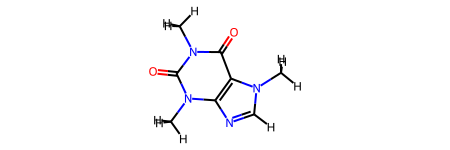

In [7]:
pk.mol

In [8]:
#caculate chages
print(pk.calc_resp_charges())
print(pk.calc_mulliken_charges())
print(pk.calc_lowdin_charges())

[-0.20810019  0.06752664  0.08393906 -0.46785215  0.12070454 -0.09084106
  0.35834362 -0.49495331 -0.04696893 -0.02877608  0.37000317 -0.53027854
  0.01788361  0.01153903  0.11234483  0.11234483  0.11234483  0.17379145
  0.0601236   0.0601236   0.0601236   0.04887795  0.04887795  0.04887795]
[-0.11403344 -0.69386544  0.38638221 -0.62282333  0.63502254  0.09325524
  0.89980939 -0.63013337 -0.87906307 -0.12347217  1.09568164 -0.62726216
 -0.87748839 -0.12043546  0.16727001  0.12972954  0.16727223  0.18241308
  0.17514702  0.14565786  0.14558389  0.16748198  0.14852425  0.14934594]
[-0.13211906 -0.05264138  0.0783715  -0.275618    0.14000228 -0.12526097
  0.29285324 -0.39405069 -0.18759199 -0.13842818  0.34796897 -0.39844389
 -0.15248981 -0.13201085  0.11679987  0.10376711  0.11774972  0.12082534
  0.12159861  0.10704077  0.10596546  0.1196341   0.10812267  0.10795518]


In [9]:
mol = pk.mol
atoms = mol.GetAtoms()

In [10]:
data = {'Symbol':[atom.GetSymbol() for atom in atoms],
        'RESP': [float(atom.GetProp('RESP')) for atom in atoms],
        'MULLIKEN': [float(atom.GetProp('MULLIKEN')) for atom in atoms],
       'LOWDIN':  [float(atom.GetProp('LOWDIN')) for atom in atoms]}

In [11]:
df = pd.DataFrame(data)

In [12]:
df.round(3)

,Symbol,RESP,MULLIKEN,LOWDIN
0,C,-0.208,-0.114,-0.132
1,N,0.068,-0.694,-0.053
2,C,0.084,0.386,0.078
3,N,-0.468,-0.623,-0.276
4,C,0.121,0.635,0.140
5,C,-0.091,0.093,-0.125
6,C,0.358,0.900,0.293
7,O,-0.495,-0.630,-0.394
8,N,-0.047,-0.879,-0.188
9,C,-0.029,-0.123,-0.138


In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

In [14]:
plt.style.use('ggplot')

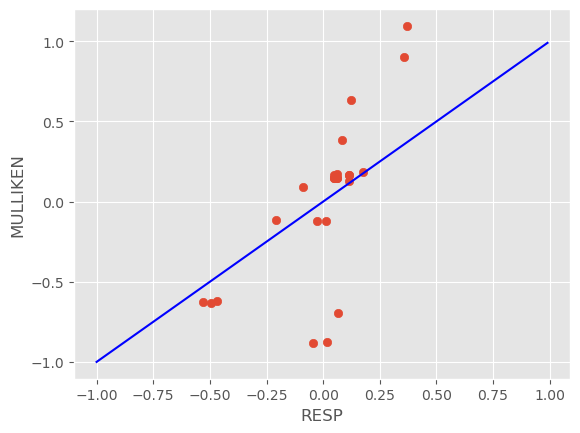

In [15]:
# RESP charge and MULLIKEN charge shows high correlation
plt.scatter(df.RESP, df.MULLIKEN)
plt.xlabel('RESP')
plt.ylabel('MULLIKEN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')

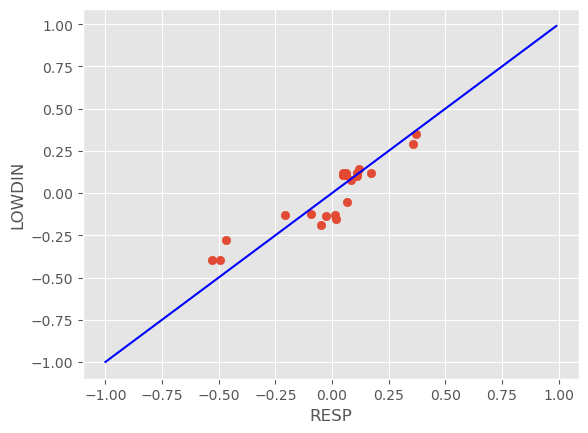

In [16]:
plt.scatter(df.RESP, df.LOWDIN)
plt.xlabel('RESP')
plt.ylabel('LOWDIN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')

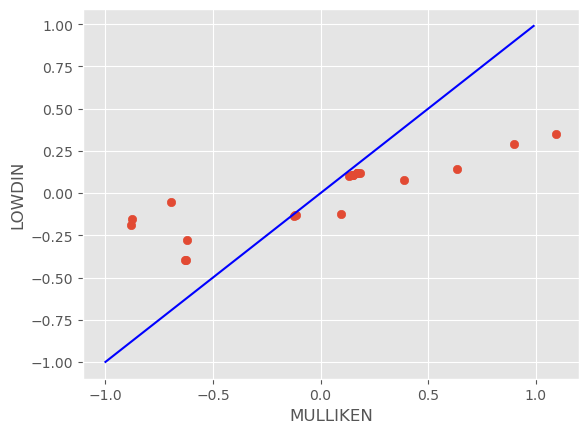

In [17]:
plt.scatter(df.MULLIKEN, df.LOWDIN)
plt.xlabel('MULLIKEN')
plt.ylabel('LOWDIN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')